# Project 2 Churn Analysis
## Francis Yang - 12/5/2022

This project is about a very common business problem: analyzing customer churn. In this project, using *supervised learning models*, you will identify cell phone service customers who are more likely to stop using the service in the future and create a model that can predict if a certain customer will drop the service. Furthermore, it would help to analyze the top factors that influence user retention to guide the company prevent user churn. The dataset contains the information of customers' plans and usage of the service, as well as whether or not they stopped using the service eventually. You may find solutions to very similar data science problems on many different platforms. It is important that you put all your effort to get to a working solution yourself.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

data = pd.read_csv("datasets/churn.csv")

In [2]:
data.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,?,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   object 
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   object 
 4   intl_plan                      5000 non-null   object 
 5   voice_mail_plan                5000 non-null   object 
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   o

Correct predictor data type

In [4]:
cmap = {" False.":False, " True.":True}
data['churned'] = data['churned'].replace(cmap)

Correct NaN values and data type

In [5]:
data['total_eve_charge'] = data['total_eve_charge'].replace({'?':np.nan})
data['total_eve_charge'] = data['total_eve_charge'].astype(float)
data['intl_plan'] = data['intl_plan'].astype('category')
data['voice_mail_plan'] = data['voice_mail_plan'].astype('category')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   state                          5000 non-null   object  
 1   account_length                 5000 non-null   int64   
 2   area_code                      5000 non-null   int64   
 3   phone_number                   5000 non-null   object  
 4   intl_plan                      5000 non-null   category
 5   voice_mail_plan                5000 non-null   category
 6   number_vmail_messages          5000 non-null   int64   
 7   total_day_minutes              5000 non-null   float64 
 8   total_day_calls                5000 non-null   int64   
 9   total_day_charge               5000 non-null   float64 
 10  total_eve_minutes              5000 non-null   float64 
 11  total_eve_calls                5000 non-null   int64   
 12  total_eve_charge               499

## Visualization

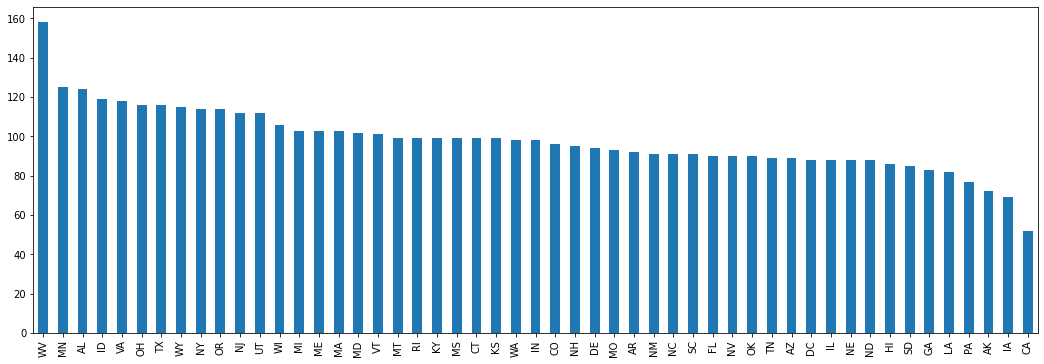

In [7]:
data['state'].value_counts().plot(kind='bar',figsize=(18,6));

Somewhat uniform distribution of samples

In [8]:
data['state'].value_counts().shape

(51,)

Washington DC has its own data

In [27]:
test = data[['intl_plan','voice_mail_plan','churned']]
test.groupby('churned')

<AxesSubplot:>

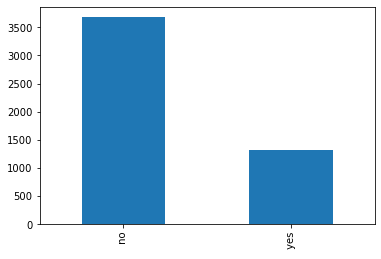

In [12]:
data['voice_mail_plan'].value_counts().plot(kind='bar')

In [ ]:
gc = data.groupby(by=['state','area_code','churned'])

In [ ]:
group_means = gc.mean()
group_means

There are only 3 area codes, also each state has the same area code. This is not real because there are states with only 1 area code in real life.

### Churn group
Group means represented below. Some columns will not make sense like phone number and categorical columns, and are removed automatically.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

fig, axs = plt.subplots(1, 3, figsize=(20,20))
codes = ['415','408','510']
for i, ax in enumerate(axs.ravel()):
    churn = group_means.filter(like='True', axis=0).filter(
        like=codes[i], axis=0).reset_index((1, 2)).drop(['area_code', 'churned'], axis=1)
    
    min_max_scaler = MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(churn.values)
    s_churn = pd.DataFrame(x_scaled, columns=group_means.columns,index=churn.index)
    
    ax.imshow(s_churn, cmap='viridis')
    ax.set_title(f'Area {codes[i]}')
    ax.set_xticks(np.arange(15), labels=churn.columns, rotation='vertical')
    ax.set_yticks(np.arange(churn.shape[0]), labels=churn.index)
plt.colorbar(axs[0].images[0],ax=axs,location='top');

Looking along the columns of area 408, there is a strong absence in `number_vmail_messages`. This is the easiest commonality to see, but with dimension reduction, like PCA, we can find more columns that have a strong indicator of churn. 

In [ ]:
#Combined churned and not churned
table = pd.pivot_table(data, values='number_customer_service_calls', index=['state'],columns=['area_code'], aggfunc=np.sum)

fig, ax = plt.subplots(figsize=(20,6))
plt.imshow(table.T,cmap='viridis')
plt.colorbar(orientation='horizontal')
ax.set_xticks(np.arange(51), labels=table.index)
ax.set_yticks(np.arange(3), labels=table.columns)
ax.set_title("# of Customer Service Calls per Area per State")
plt.show()

In [ ]:
table2 = pd.pivot_table(data, values=['account_length','number_customer_service_calls', 'churned'], index=['state'],columns=['area_code'], aggfunc=np.sum)
table2.plot(kind='scatter',x='account_length', y='number_customer_service_calls', s='churned', figsize=(20,20))

In [ ]:
table2